# Roulette outcomes

In this exercise, we'll explore the fortunes of someone playing a roulette game using a wheel that contains the numbers 1-36. We'll then look at the effect of including the zero and double-zero that push the odds in the house's favor.

In [1]:
# Loading modules and setting up environment
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy
from collections import Counter
from collections import OrderedDict

mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

Roulette has multiple betting strategies, but we'll restrict ourselve to two of them

+ Betting on even/odd - pays 2x (original bet + like amount) on win
+ Betting on a single number - pays 36x (original bet + 35x) on a win

So that we can easily handle the zero and double-zero later in this exercise, we'll work with strings rather than integers and write the smaller numbers with leading zero.

In [2]:
bins_nozero = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
               '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
               '31', '32', '33', '34', '35', '36']
bins_zero = copy.copy(bins_nozero)
bins_zero.append('0')
bins_dzero = copy.copy(bins_zero)
bins_dzero.append('00')

So what's the deal with the zero and double zero? Why does it matter? Although it doesn't seem like much, it pushes the odds slightly in the house's favor. The payoffs remain the same, but your chances of winning go down.

+ even/odd strategy - the zero and double zero are not counted as even numbers. Your chance of winning is now 18/37 = 0.4865 (w/ zero) and 18/38 = 0.4739 (w/ double zero)
+ single number strategy - can choose any number, including zero or double zero, but odds of winning are now 1/37 or 1/38 instead of 1/36.

Before we get started with our game, let's generate some spins and convince ourselves that the wheel at least looks fair.

Minimum count =  25878
Maximum count =  26634
Min/Max =  0.9716152286551025


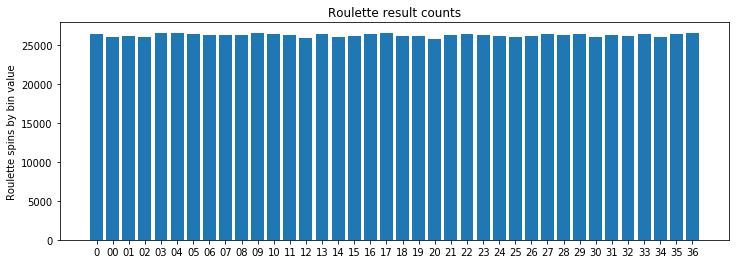

In [3]:
# nspins = number of spins
nspins = 1000000

# Select a wheel (uncomment one of the following)
#bins = bins_nozero
#bins = bins_zero
bins = bins_dzero

spins = np.random.choice(bins, size=nspins)
od = OrderedDict(sorted(Counter(spins).items()))
print('Minimum count = ', min(od.values()))
print('Maximum count = ', max(od.values()))
print('Min/Max = ', min(od.values())/max(od.values()))

labels = od.keys()
counts = od.values()

f, ax = plt.subplots(1, 1, figsize=(12,4))
x_pos = np.arange(len(labels))
ax.bar(x_pos, counts, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Roulette spins by bin value')
ax.set_title('Roulette result counts')
plt.show()

Now that we've setup our roulette wheel and convinced ourselves that it's working properly. Let's pretend that we're at the casino and see how our fortunes change over time. To simplify our code, we'll assume that you always select 'even' when using the even/odd strategy and '1' when selecting a single number. This is justified since all spins occur with equal probability.

Lose


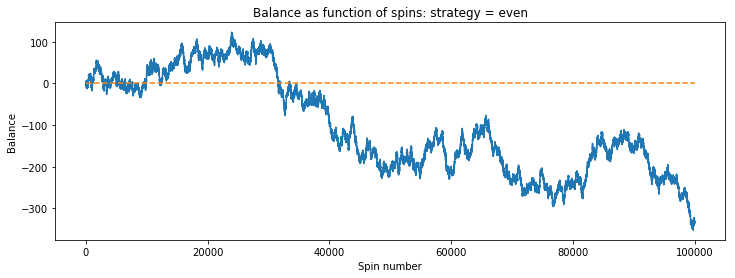

In [16]:
# nspins = number of spins
nspins = 100000

# Strategies (uncomment one of the following)
strategy = 'even' # Win on 2, 4, 6, ... 36 but not 0 or 00
#strategy = 'single' # Win by picking any single number, including 0 or 00

if strategy == 'even':
    payoff = 1  # Original bet plus 1
elif strategy == 'single':
    payoff = 35 # original bet plus 35

# Select a wheel (uncomment one of the following)
bins = bins_nozero
#bins = bins_zero
#bins = bins_dzero

balance = [0]
spins = np.random.choice(bins, size=nspins)
for spin in spins:
    if strategy == 'even':
        if int(spin) % 2 == 0 and int(spin) != 0:
            balance.append(balance[-1]+1)
        else:
            balance.append(balance[-1]-1)
    if strategy == 'single':
        if int(spin) == 1:
            balance.append(balance[-1]+35)
        else:
            balance.append(balance[-1]-1)

if balance[-1] > 0:
    print("Win")
elif balance[-1] < 0:
    print("Lose")
else:
    print("Tie")

x = range(nspins+1)
xzero = [0, nspins]
yzero = [0, 0]
        
f, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x, balance, xzero, yzero, '--')
ax.set_ylabel('Balance')
ax.set_xlabel('Spin number')
ax.set_title('Balance as function of spins: strategy = ' + strategy)
plt.show()

See if there is a cleaner way to add a zero line to the graph